# Notebook Title
William Hugo Ravindra Putra \
Batch 11

## Description

### Objective
Milestones 1 ini dibuat guna mengevaluasi Pembelajaran Phase 0 sebagai berikut:
- Mampu melakukan hypothesis testing terhadap dataset yang diberikan.
- Mampu membuat dashboard interaktif terhadap dataset yang diberikan.
- Mampu mempresentasikan hasil visualisasi data dan temuan.


## Working Area

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [31]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [32]:
# I could make a graph on Product Lines bought by each Gender
# Most Popular Product Line in each city
# Biggest Total by each Product Line
# Payment Method by Product Line / Gender / City
# Rating by Product Line
# Purchase made sorted by Date and Time
# Gross Margin Percentage of each Product Line
# Purchase made by Customer Type sorted with Total / Gross Margin Percentage / Quantity

### Context
The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data

### Attribute information
- Invoice id : Computer generated sales slip invoice identification number
- Branch : Branch of supercenter (3 branches are available identified by A, B and C).
- City : Location of supercenters
- Customer type : Type of customers, recorded by Members for customers using member card and Normal for without member card.
- Gender : Gender type of customer
- Product line : General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
- Unit price : Price of each product in $
- Quantity : Number of products purchased by customer
- Tax : 5% tax fee for customer buying
- Total : Total price including tax
- Date : Date of purchase (Record available from January 2019 to March 2019)
- Time : Purchase time (10am to 9pm)
- Payment : Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)
- COGS : Cost of goods sold
- Gross margin percentage : Gross margin percentage
- Gross income : Gross income
- Rating : Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

In [33]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [34]:
df1 = df.copy()

In [35]:
df1.rename(columns = {'Customer type':'Customer'}, inplace = True)

Product Lines bought by each Gender

In [36]:
pls = df1[['Product line', 'Gender', 'Quantity']]
pls

,Product line,Gender,Quantity
0,Health and beauty,Female,7
1,Electronic accessories,Female,5
2,Home and lifestyle,Male,7
3,Health and beauty,Male,8
4,Sports and travel,Male,7
...,...,...,...
995,Health and beauty,Male,1
996,Home and lifestyle,Female,10
997,Food and beverages,Male,1
998,Home and lifestyle,Male,1


In [37]:
df1.groupby(['Product line', 'Gender'])['Quantity'].sum()

Product line            Gender
Electronic accessories  Female    488
                        Male      483
Fashion accessories     Female    530
                        Male      372
Food and beverages      Female    514
                        Male      438
Health and beauty       Female    343
                        Male      511
Home and lifestyle      Female    498
                        Male      413
Sports and travel       Female    496
                        Male      424
Name: Quantity, dtype: int64

In [38]:
fig = px.histogram(pls, x="Quantity", y="Product line",color='Gender', barmode='group')
fig.show()

Most Popular Product Line in each city

In [39]:
something = df1[['Product line', 'City', 'Quantity']]
something

,Product line,City,Quantity
0,Health and beauty,Yangon,7
1,Electronic accessories,Naypyitaw,5
2,Home and lifestyle,Yangon,7
3,Health and beauty,Yangon,8
4,Sports and travel,Yangon,7
...,...,...,...
995,Health and beauty,Naypyitaw,1
996,Home and lifestyle,Mandalay,10
997,Food and beverages,Yangon,1
998,Home and lifestyle,Yangon,1


In [40]:
fig = px.histogram(something, x="Quantity", y="City",color='Product line', barmode='group', width=900)
fig.show()

Payment Method by Total and City

In [41]:
pay_method = df1[['Payment', 'City', 'Total']]
pay_method

,Payment,City,Total
0,Ewallet,Yangon,548.9715
1,Cash,Naypyitaw,80.2200
2,Credit card,Yangon,340.5255
3,Ewallet,Yangon,489.0480
4,Ewallet,Yangon,634.3785
...,...,...,...
995,Ewallet,Naypyitaw,42.3675
996,Ewallet,Mandalay,1022.4900
997,Cash,Yangon,33.4320
998,Cash,Yangon,69.1110


In [42]:
fig = px.histogram(pay_method, x="Total", y="City",color='Payment', barmode='group', width=900)
fig.show()

Purchase made sorted by Date and Time

In [43]:
crowded = df1[['Date', 'Time', 'Total', 'City']]
crowded

,Date,Time,Total,City
0,1/5/2019,13:08,548.9715,Yangon
1,3/8/2019,10:29,80.2200,Naypyitaw
2,3/3/2019,13:23,340.5255,Yangon
3,1/27/2019,20:33,489.0480,Yangon
4,2/8/2019,10:37,634.3785,Yangon
...,...,...,...,...
995,1/29/2019,13:46,42.3675,Naypyitaw
996,3/2/2019,17:16,1022.4900,Mandalay
997,2/9/2019,13:22,33.4320,Yangon
998,2/22/2019,15:33,69.1110,Yangon


In [44]:
crowded = crowded.sort_values(by="Time", ascending=True)

In [45]:
fig = px.scatter(crowded, x="Time", y="Date",color='City', width=900)
fig.show()

Purchase made by Customer Type sorted with Total / Gross Income / Quantity

In [46]:
df1.head(2)

,Invoice ID,Branch,City,Customer,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6


In [47]:
purchase_type = df1[['Customer', 'Quantity', 'Total', 'gross income']]
purchase_type

,Customer,Quantity,Total,gross income
0,Member,7,548.9715,26.1415
1,Normal,5,80.2200,3.8200
2,Normal,7,340.5255,16.2155
3,Member,8,489.0480,23.2880
4,Normal,7,634.3785,30.2085
...,...,...,...,...
995,Normal,1,42.3675,2.0175
996,Normal,10,1022.4900,48.6900
997,Member,1,33.4320,1.5920
998,Normal,1,69.1110,3.2910


In [48]:
fig = px.histogram(purchase_type, x="Total", y="gross income",color='Customer',barmode='group', width=900)
fig.show()

### Hypothesis Testing
H0 : IF Customer Type = Member, Gross Income is more than the average

H1 : If Customer Type != Member, Gross Income is less than the average

The purpose of this Hypothesis Testing is to check if a member-ed customer gives us more gross income or not

Measure of Central Tendency

In [49]:
print('Mean: ', purchase_type['gross income'].mean())
print('Median: ', purchase_type['gross income'].median())
print('Modus: ', purchase_type['gross income'].mode())
print('Maximum: ', purchase_type['gross income'].max())
print('Minimum: ', purchase_type['gross income'].min())

Mean:  15.379369000000002
Median:  12.088000000000001
Modus:  0     4.1540
1     4.4640
2     8.3770
3     9.0045
4    10.3260
5    10.3635
6    12.5700
7    13.1880
8    22.4280
9    39.4800
dtype: float64
Maximum:  49.65
Minimum:  0.5085


Measure of Variance: Range

In [50]:
numcols = ['gross income', 'Total']
for col in numcols:
    print(df[col].name + ' range: ' + str(df[col].max() - df[col].min()))

gross income range: 49.1415
Total range: 1031.9715


Quartiles

In [51]:
#membuat quartiles 
Q1 = np.percentile(purchase_type['gross income'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(purchase_type['gross income'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

#Melihat size data dengan Outlier backers
print("With Outlier: ", purchase_type.shape)
 
# Upper bound 
upper = np.where(purchase_type['gross income'] >= (Q3+1.5*IQR))
# Lower bound 
lower = np.where(purchase_type['gross income'] <= (Q1-1.5*IQR))
 
#Hilangkan Outliers-nya
purchase_type.drop(upper[0], inplace = True)
purchase_type.drop(lower[0], inplace = True)
 
#Melihat size data tanpa Outlier backers
print("Without Outlier: ", purchase_type.shape)

With Outlier:  (1000, 4)
Without Outlier:  (991, 4)


c:\Users\Hugo\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Confidence Interval with outlier

In [52]:
from scipy import stats
stats.norm(...)
income = purchase_type['gross income']
mean, sigma = np.mean(income), np.std(income)
conf_int = stats.norm.interval(0.95, loc=mean, scale=sigma)
conf_int

(-7.098207438777404, 37.25104094029102)

Variance and Standard Deviation

In [53]:
print('Variance: ', purchase_type['gross income'].var())
print('Standard Deviation: ', purchase_type['gross income'].std())

Variance:  128.1311766407898
Standard Deviation:  11.31950425773098


In [54]:
refined_purchase = purchase_type.copy()
refined_purchase.Customer[refined_purchase.Customer == 'Member'] = 1
refined_purchase.Customer[refined_purchase.Customer == 'Normal'] = 0

C:\Users\Hugo\AppData\Local\Temp/ipykernel_18156/1464730300.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Hugo\AppData\Local\Temp/ipykernel_18156/1464730300.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [55]:
refined_purchase = refined_purchase[refined_purchase["gross income"] >= 15.37]
refined_purchase['gross income'].shape

(395,)

Skewness

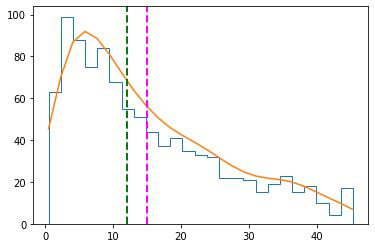

In [62]:
purchase = purchase_type['gross income']
density = stats.gaussian_kde(purchase)
n, x, _ = plt.hist(purchase, histtype='step', bins=25)  
plt.plot(x, density(x)*2**11)
plt.axvline(purchase.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(purchase.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

P-Value

In [57]:
t_stat,p_val = stats.ttest_rel(refined_purchase['gross income'].sample(200),refined_purchase['Customer'].sample(200))
print('P-value:',p_val)

P-value: 2.1501595372751187e-109


## Conclusions
Untuk Hypothesis testing, saya menggunakan data (Purchase made by Customer Type sorted with Total, Gross Income and Quantity) dan cara A/B Testing atau Paired Testing, karena saya mau tahu jika ada hubungan/tergantungan dengan customer type dan gross income.

Dari Hypothesis testing, saya dapat menyimpulkan bahwa H0 dapat di-reject karena P-value dibawah 0.05